In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Heart attack data.xlsx')

In [4]:
from sklearn.model_selection import train_test_split

df = df.dropna()

X = df[["Age","Gender","Heart Rate","Pressure High","Pressure Low","Glucose","KCM","Troponin"]]
y = df["Output"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9735849056603774
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       116
         1.0       0.99      0.97      0.98       149

    accuracy                           0.97       265
   macro avg       0.97      0.97      0.97       265
weighted avg       0.97      0.97      0.97       265



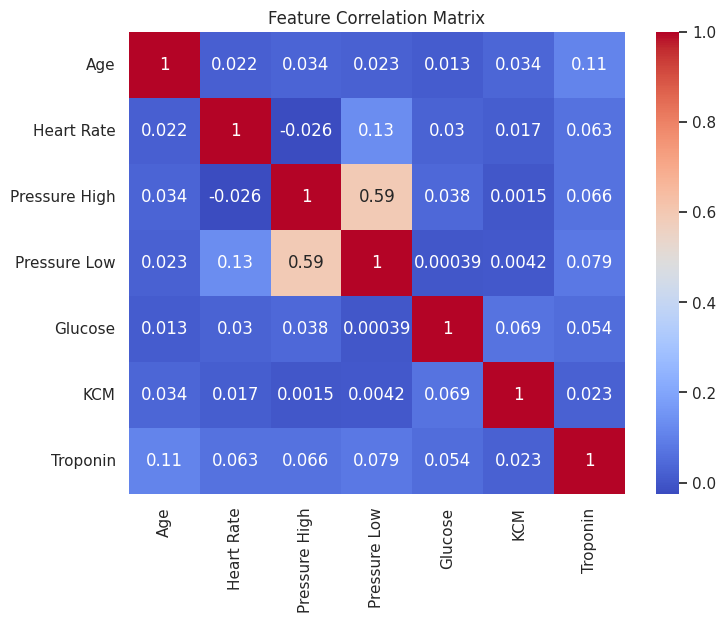

In [7]:
corr = df[["Age","Heart Rate","Pressure High","Pressure Low","Glucose","KCM","Troponin"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ["Age", "Heart Rate", "Pressure High", "Pressure Low", "Glucose", "KCM", "Troponin"]
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [9]:
from sklearn.decomposition import PCA


In [11]:
X_bp = df[["Pressure High", "Pressure Low"]]

# Standardize
scaler = MinMaxScaler()
X_bp_scaled = scaler.fit_transform(X_bp)

# PCA with 2 components
pca = PCA(n_components=2)
bp_pca = pca.fit_transform(X_bp_scaled)

# Add back to DataFrame
df["BP_PC1"] = bp_pca[:,0]  # main combined BP signal
df["BP_PC2"] = bp_pca[:,1]

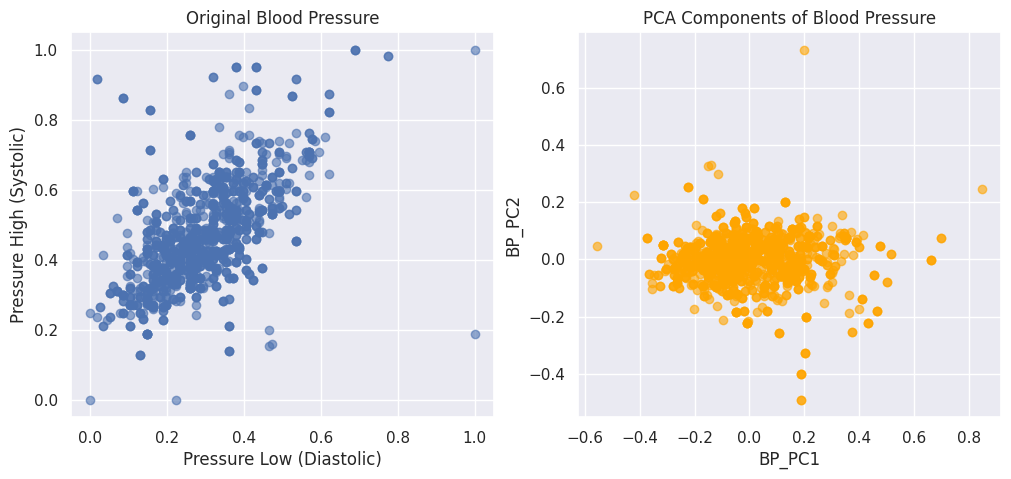

In [12]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(df["Pressure Low"], df["Pressure High"], alpha=0.6)
plt.xlabel("Pressure Low (Diastolic)")
plt.ylabel("Pressure High (Systolic)")
plt.title("Original Blood Pressure")

# PCA-transformed scatter
plt.subplot(1,2,2)
plt.scatter(df["BP_PC1"], df["BP_PC2"], alpha=0.6, color="orange")
plt.xlabel("BP_PC1")
plt.ylabel("BP_PC2")
plt.title("PCA Components of Blood Pressure")

plt.show()

Explained variance ratio: [0.80468093 0.19531907]


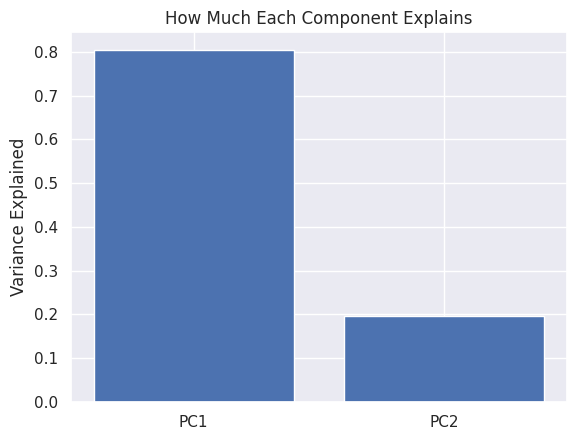

In [13]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
plt.bar(["PC1", "PC2"], pca.explained_variance_ratio_)
plt.ylabel("Variance Explained")
plt.title("How Much Each Component Explains")
plt.show()
